In [3]:
import numpy as np

import numpy.random as npr


import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

In [16]:
#Données

L = 56.0*10**-2 #Longueur du tube (m)
dL = 0.2*10**-2

T = np.array([29.9, 39.0, 50.0, 60.0, 80.1, 90.3])+273.15 #Température mesurée au thermomètre dans le tube (C°)
dT = np.zeros([6,1]) + 0.2

lambda_exp = np.array([11.9, 11.5, 11.4, 11.3, 11.8, 11.5])*10**-2 #Longueur mesurée des noeuds de pression dans le tube (m)
dlambda_exp = 0.2*10**-2

f = np.array([3, 3.1, 3.1, 3.1, 3.3, 3.3])*10**3 #Fréquence du GBF (Hz)
df = 0.01*10**3

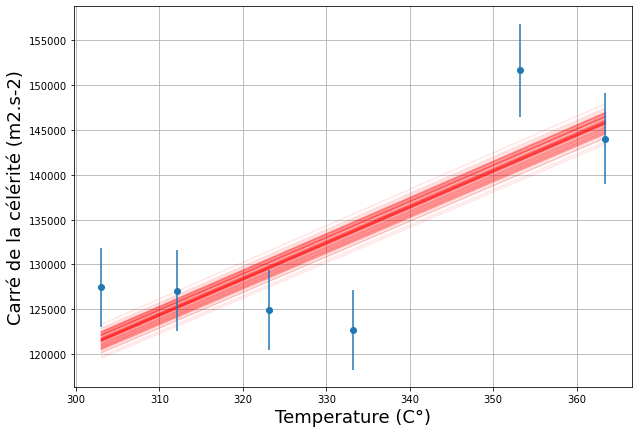

401.0866755826544 +- 2.3591820884565244


In [20]:
#Calcul de la vitesse de propagation

c = lambda_exp * f
dc = c*np.sqrt((df/f)**2+(dlambda_exp/lambda_exp)**2)

dc2 = c*2*dc

#Monte-Carlo
def f_lin(x,a):
    return a*x

N_mc = 100 # nombre de simulations
param = np.zeros((1, N_mc))


for i in range(N_mc):
    
    c2_mc = np.array([])
    T_mc = np.array([])
    
    for k in range (len(T)) :
        c2_mc = np.append(c2_mc, npr.normal(loc=(c[k]**2), scale=dc2))
        T_mc = np.append(T_mc, npr.normal(loc=T[k], scale=dT))
            
    pop, covop = curve_fit(f_lin, T_mc, c2_mc)
    param[0,i] = pop[0]
    
y_th = f_lin(T, *pop)

plt.figure(5, figsize=(10,7))
for i in range(N_mc):
    y_th = f_lin(T, *param[:,i])
    plt.plot(T, y_th,'r', alpha=0.1)
plt.errorbar(T, c**2, xerr=0.2, yerr=dc2, fmt='o')
plt.grid(which='both')
plt.xlabel('Temperature (C°)', fontsize=18)
plt.ylabel('Carré de la célérité (m2.s-2)', fontsize=18)
plt.show()    

#Calcul de la pente

a_moy = np.mean(param[0,:])
a_sig = np.std(param[0,:])

print (a_moy, '+-',a_sig )

